<a href="https://colab.research.google.com/github/mohmaed7777/Get-starting-with-RNNs-LSTMs/blob/main/Get_starting_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the Data**:-
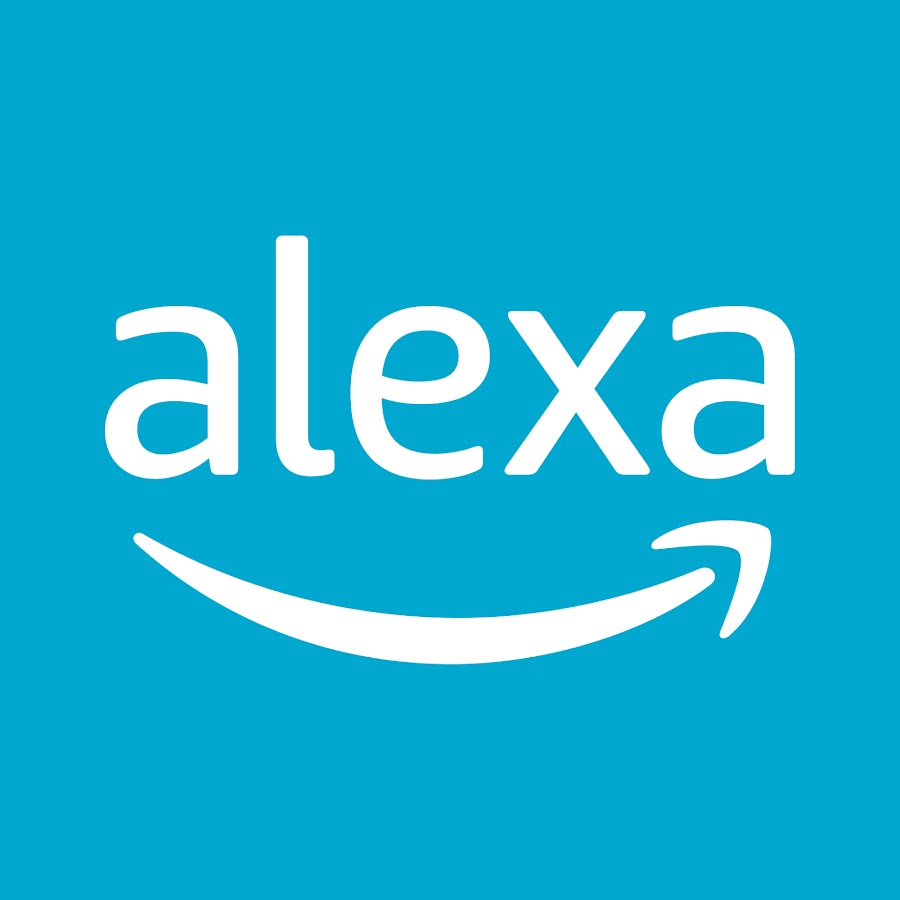

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

**Objectives:-**


Build machine learning classifier(RNN and LSTMs) in dorder to clssifiy which of these reviews are +ve or -ve 


**Source:**

Kaggle.com



**Getting Strating With NLP:-**

In [34]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras import initializers
print("Setup compeleted")

Setup compeleted


In [35]:
data = pd.read_csv('/content/amazon_alexa.tsv',sep="\t")
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


**EDA and Data Visulizations:-**

In [36]:
unique_values = data.nunique() # Determine the unique values in the dataframe:-
unique_values

rating                 5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64

In [37]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [38]:
data.isnull().sum() # Checkout how many missing values do we have:-

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [39]:
data.drop(['rating','date','variation'], axis=1, inplace=True) # Dropout unwanted Columns 

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'Positve review vs Negetive'),
 Text(0.5, 1.0, 'Amazon Alexa')]

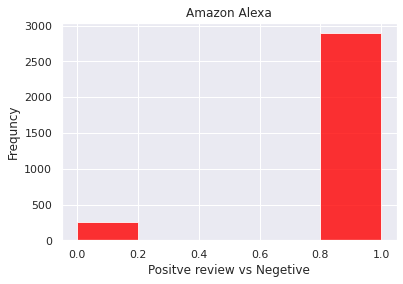

In [40]:
# create a histogram: 

ax = plt.axes()
ax.hist(data.feedback, bins=5, alpha=0.8, color='red')
ax.set(xlabel='Positve review vs Negetive',
       ylabel='Frequncy',
       title='Amazon Alexa')

In [41]:
data.shape

(3150, 2)

**Text preprocessing :-**

In [73]:
vocab_size = 200
embedding_dim = 8
max_length = 15
rnn_hidden_dim = 8
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
batch_size=64

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['verified_reviews'],data['feedback'],test_size = 0.3)

In [76]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [81]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [82]:
X_train.shape

(2205,)

In [83]:
X_test.shape

(945,)

#**1-Long-term-short-memory(LSTMs)Neural Networks:-**

In [84]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [85]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          12800     
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 124,289
Trainable params: 124,289
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Train the number and set the number of epochs:-

num_epochs = 20
model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
69/69 - 13s - loss: 0.3308 - accuracy: 0.9175 - val_loss: 0.2776 - val_accuracy: 0.9122
Epoch 2/20
69/69 - 3s - loss: 0.2386 - accuracy: 0.9211 - val_loss: 0.2301 - val_accuracy: 0.9175
Epoch 3/20
69/69 - 3s - loss: 0.1978 - accuracy: 0.9252 - val_loss: 0.2120 - val_accuracy: 0.9217
Epoch 4/20
69/69 - 3s - loss: 0.1749 - accuracy: 0.9370 - val_loss: 0.2127 - val_accuracy: 0.9249
Epoch 5/20
69/69 - 3s - loss: 0.1590 - accuracy: 0.9415 - val_loss: 0.2069 - val_accuracy: 0.9291
Epoch 6/20
69/69 - 3s - loss: 0.1439 - accuracy: 0.9469 - val_loss: 0.2201 - val_accuracy: 0.9312
Epoch 7/20
69/69 - 2s - loss: 0.1315 - accuracy: 0.9537 - val_loss: 0.2271 - val_accuracy: 0.9185
Epoch 8/20
69/69 - 3s - loss: 0.1274 - accuracy: 0.9524 - val_loss: 0.2257 - val_accuracy: 0.9259
Epoch 9/20
69/69 - 3s - loss: 0.1202 - accuracy: 0.9542 - val_loss: 0.2397 - val_accuracy: 0.9228
Epoch 10/20
69/69 - 2s - loss: 0.1125 - accuracy: 0.9601 - val_loss: 0.2416 - val_accuracy: 0.9291
Epoch 11/20
69/69 

**Get the final accuracy:-**

In [88]:
results = model.evaluate(testing_padded, y_test, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.32204
Test Accuracy: 93.02%


#**2-Recurrent Neural Network(RNNs):-**

In [89]:
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, embedding_dim))  #This layer takes each integer in the sequence and embeds it in a 50-dimensional vector
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=X_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

In [90]:
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 8)           1600      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________


In [91]:
#rmsprop = tensorflow.keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [92]:
model_rnn.fit(training_padded, training_labels,
          batch_size=batch_size,
          epochs=20,
          validation_data=(testing_padded, testing_labels))

Epoch 1/20
35/35 [==============================] - 2s 16ms/step - loss: 0.4585 - accuracy: 0.9211 - val_loss: 0.3119 - val_accuracy: 0.9122
Epoch 2/20
35/35 [==============================] - 0s 7ms/step - loss: 0.2718 - accuracy: 0.9211 - val_loss: 0.2889 - val_accuracy: 0.9122
Epoch 3/20
35/35 [==============================] - 0s 7ms/step - loss: 0.2601 - accuracy: 0.9211 - val_loss: 0.2737 - val_accuracy: 0.9122
Epoch 4/20
35/35 [==============================] - 0s 7ms/step - loss: 0.2423 - accuracy: 0.9211 - val_loss: 0.2541 - val_accuracy: 0.9122
Epoch 5/20
35/35 [==============================] - 0s 7ms/step - loss: 0.2193 - accuracy: 0.9211 - val_loss: 0.2428 - val_accuracy: 0.9122
Epoch 6/20
35/35 [==============================] - 0s 7ms/step - loss: 0.2015 - accuracy: 0.9211 - val_loss: 0.2238 - val_accuracy: 0.9122
Epoch 7/20
35/35 [==============================] - 0s 8ms/step - loss: 0.1913 - accuracy: 0.9211 - val_loss: 0.2352 - val_accuracy: 0.9122
Epoch 8/20
35/35 [=

In [93]:
results = model_rnn.evaluate(testing_padded, y_test, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.29093
Test Accuracy: 91.96%


#**Summary:-**

**Total Accuracy with applying LSTMs===> 93%.**

**Total Accuracy When applying RNNs===>91.9%**